In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy.stats import bootstrap
from numpy.fft import fft2, ifft2

In [2]:
def fft_correl2d(x,y):
    """ 2D correlation, using FFT"""
    fr = fft2(x)
    fr2 = fft2(y)
    m,n = fr.shape
    cc = np.real(ifft2(fr*fr2))
    # cc = np.roll(cc, -m/2+1,axis=0)
    # cc = np.roll(cc, -n/2+1,axis=1)
    return cc

In [3]:
L = 30
rhos = pd.read_csv('data/hydro_j' + str(L) + 'by' + str(L) + '.dat', header=None, skiprows=1).to_numpy()[:, :-1]
rhos = rhos.reshape((-1, L, L)).astype(int)

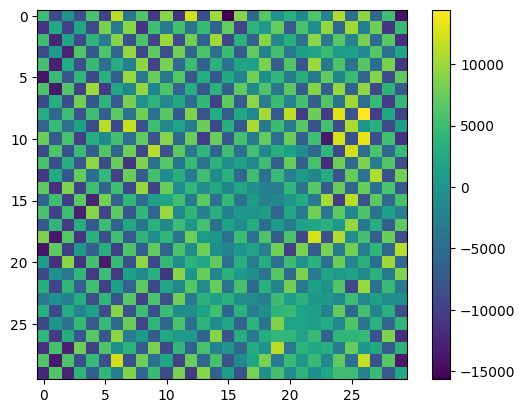

In [4]:
totals = np.zeros((L,L))
for i in range(len(rhos) - 1):
    totals += fft_correl2d(rhos[i], rhos[i+1])
plt.imshow(totals)
plt.colorbar()

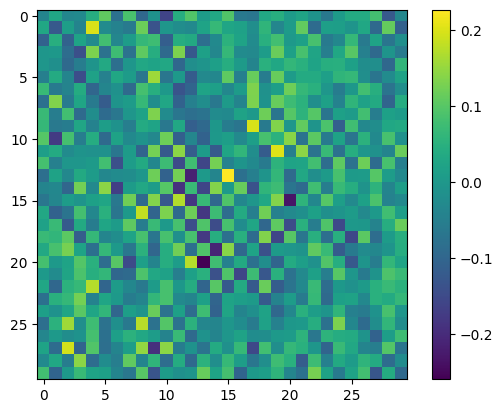

In [5]:
plt.imshow(np.average(rhos, axis=0))
plt.colorbar()

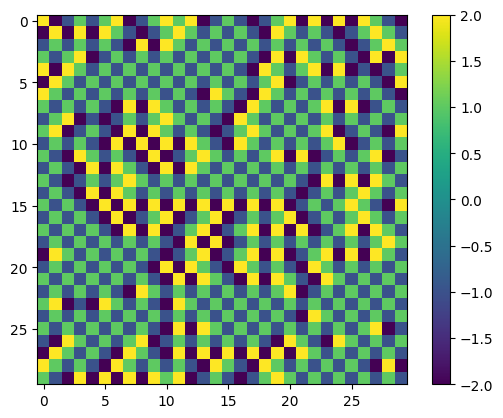

In [6]:
plt.imshow(rhos[-1])
plt.colorbar()

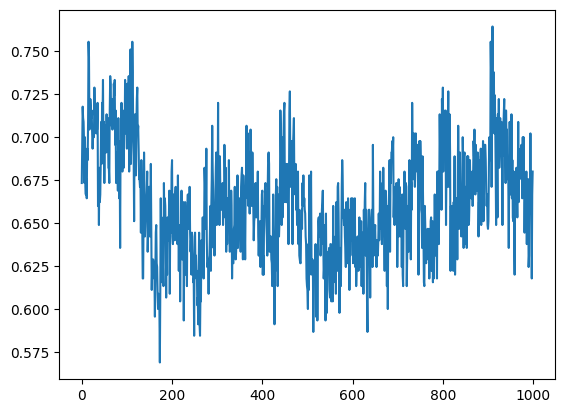

In [7]:
plt.plot(np.mean(rhos%2, axis=(1,2)))

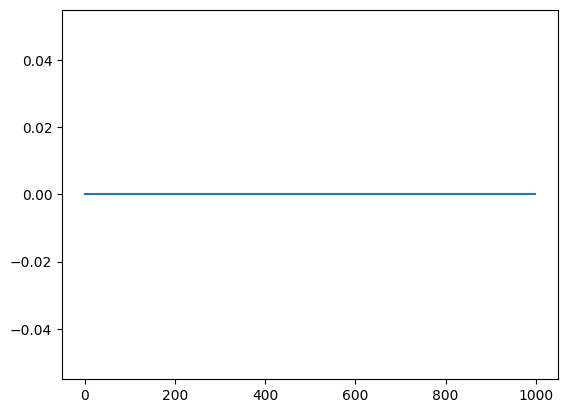

In [8]:
plt.plot(np.sum(rhos, axis=(1,2)))

In [9]:
result = np.zeros((L, L))
for idx in range(len(rhos)-1):
    x = rhos[idx]
    y = rhos[idx+1]
    for i in range(L):
        for j in range(L):
            result[i,j] += np.average(x[i:,j:] * y[:L-i,:L-j])
result /= len(rhos)-1

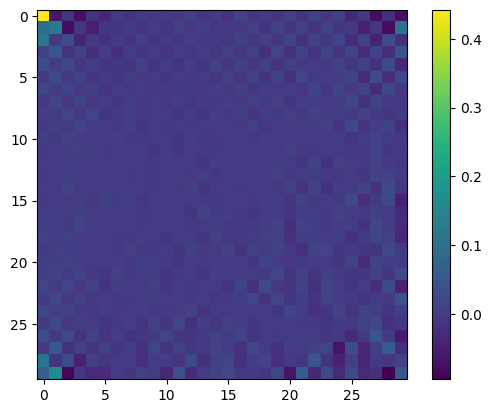

In [10]:
plt.imshow(result)
plt.colorbar()

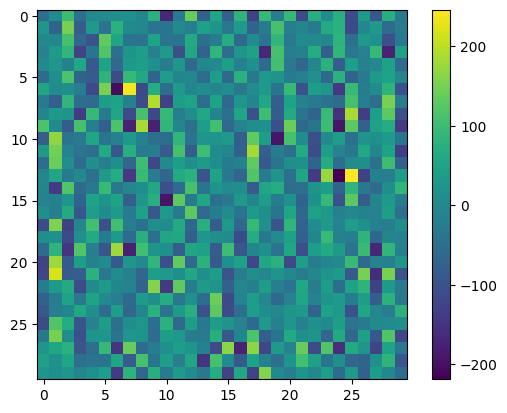

In [11]:
plt.imshow(fft_correl2d(rhos[0], rhos[1]))
plt.colorbar()

In [12]:
result[:,:5]

array([[ 4.42308976e-01, -5.94560077e-02, -1.15651366e-02,
        -7.29358989e-02, -1.60891661e-02],
       [ 9.57129543e-02,  1.26618890e-01, -7.61179899e-02,
        -7.51709564e-03, -4.50609761e-02],
       [ 1.20406120e-01, -5.10362579e-04,  3.12480848e-02,
        -3.89913723e-02, -3.06900307e-03],
       [ 9.67263560e-03,  4.69358247e-02, -1.29137074e-02,
         1.23292016e-02, -2.17567995e-02],
       [ 3.30907831e-02,  1.17491497e-03,  2.10457710e-02,
        -9.16300916e-03,  3.10073387e-03],
       [-4.31631632e-03,  2.62317490e-02, -5.16087516e-03,
         1.21766211e-02, -1.05798106e-02],
       [ 1.70628962e-02,  5.13444479e-04,  1.41570142e-02,
        -5.58428799e-03,  6.35250635e-03],
       [-5.34882709e-03,  1.67303736e-02, -5.32520098e-03,
         1.18717752e-02, -4.55974369e-03],
       [ 2.07480207e-03, -1.97219163e-03,  1.55902656e-02,
        -3.37711449e-03,  1.40385140e-02],
       [-5.02407169e-03,  6.62731697e-03,  1.17464403e-03,
         1.30977538e-02